In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

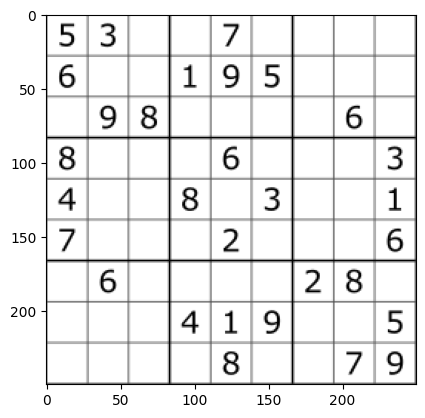

In [35]:
img = cv2.imread('drive/MyDrive/sample1.png', 0)
plt.imshow(img, cmap='gray')

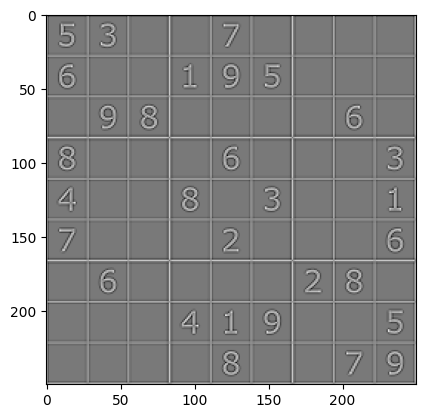

In [ ]:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')

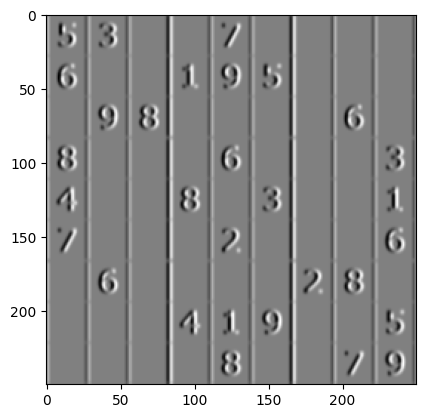

In [ ]:
# Image gradient in x direction with sobel
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx, cmap='gray')

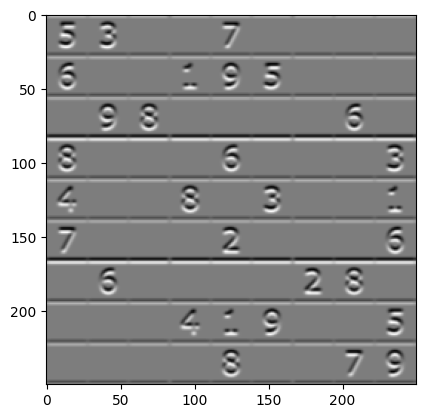

In [ ]:
# Image gradient in y direction with sobel
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.imshow(sobely, cmap='gray')

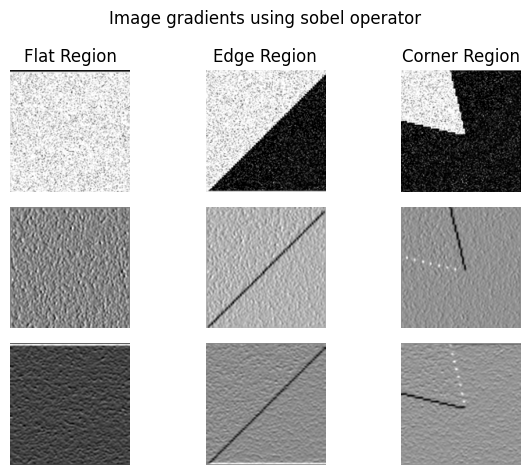

In [ ]:
# loading images
image_flat = cv2.imread('drive/MyDrive/sample-flat.png', cv2.IMREAD_GRAYSCALE)
image_edge = cv2.imread('drive/MyDrive/surface-edge.png', cv2.IMREAD_GRAYSCALE)
image_corner = cv2.imread('drive/MyDrive/surface-corner.png', cv2.IMREAD_GRAYSCALE)

# making sobel of all images
sobelx_flat = cv2.Sobel(image_flat, cv2.CV_64F, 1, 0, ksize=5)
sobely_flat = cv2.Sobel(image_flat, cv2.CV_64F, 0, 1, ksize=5)

sobelx_edge = cv2.Sobel(image_edge, cv2.CV_64F, 1, 0, ksize=5)
sobely_edge = cv2.Sobel(image_edge, cv2.CV_64F, 0, 1, ksize=5)

sobelx_corner = cv2.Sobel(image_corner, cv2.CV_64F, 1, 0, ksize=5)
sobely_corner = cv2.Sobel(image_corner, cv2.CV_64F, 0, 1, ksize=5)

# put heading of the plot
plt.suptitle('Image gradients using sobel operator')

# Plotting images
plt.subplot(3, 3, 1).axis('off')
plt.imshow(image_flat, cmap='gray')
plt.title('Flat Region')

plt.subplot(3, 3, 2).axis('off')
plt.imshow(image_edge, cmap='gray')
plt.title('Edge Region')

plt.subplot(3, 3, 3).axis('off')
plt.imshow(image_corner, cmap='gray')
plt.title('Corner Region')

plt.subplot(3, 3, 4).axis('off')
plt.imshow(sobelx_flat, cmap='gray')
plt.subplot(3, 3, 5).axis('off')
plt.imshow(sobelx_edge, cmap='gray')
plt.subplot(3, 3, 6).axis('off')
plt.imshow(sobelx_corner, cmap='gray')

plt.subplot(3, 3, 7).axis('off')
plt.imshow(sobely_flat, cmap='gray')
plt.subplot(3, 3, 8).axis('off')
plt.imshow(sobely_edge, cmap='gray')
plt.subplot(3, 3, 9).axis('off')
plt.imshow(sobely_corner, cmap='gray')

plt.tight_layout()
plt.show()


In row 1, All of the pictures are shwoing gray so all of them are near to 0.

In row 2, All of the picture is close to 0 or gray except the line, which is black so strong positive value in that direction.

In row 3, All of the picture is close to 0 except two lines, one of which is black representing strong negative value in that direction and other is white represeting strong positive value for the direction.

Sobel x could be represented as partial derivative Ix

while Sobel y could be represented as partial derivative Iy

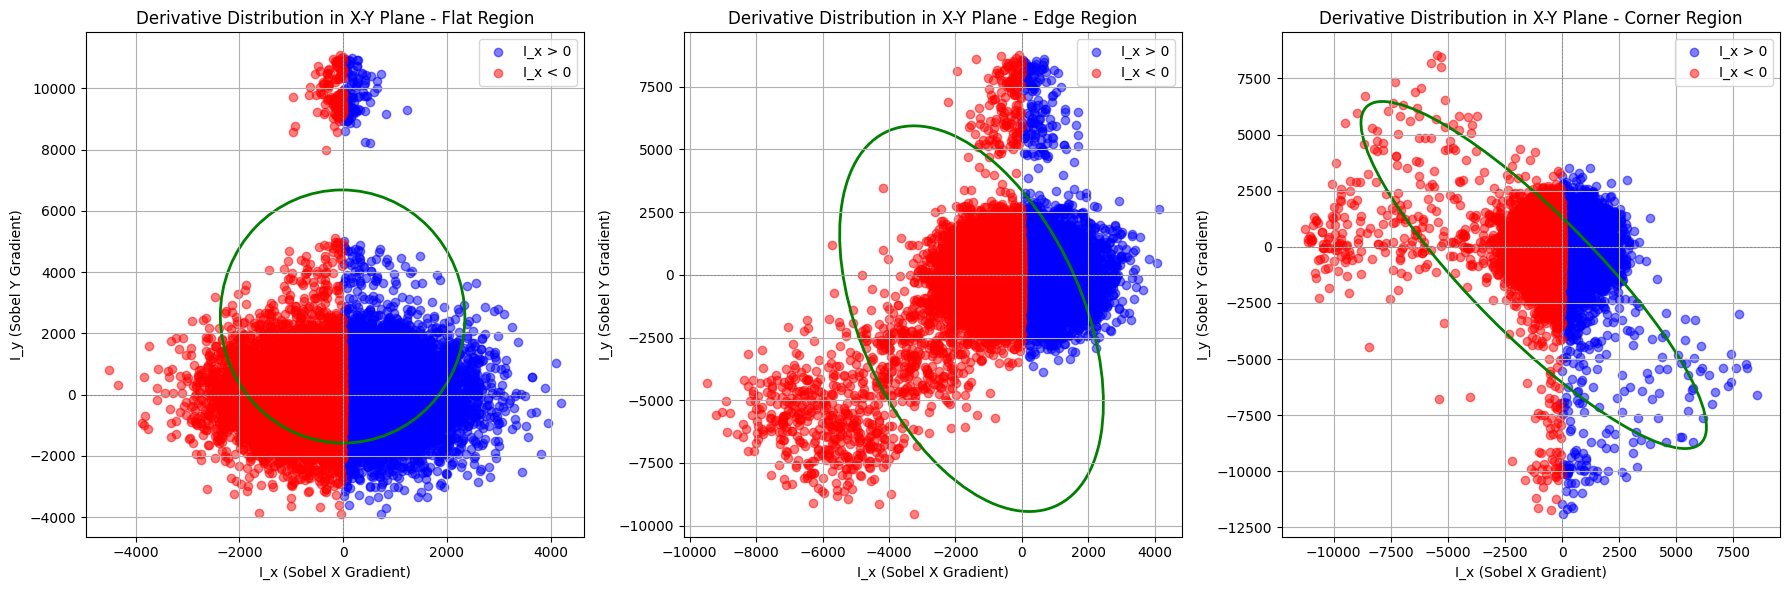

In [ ]:
from matplotlib.patches import Ellipse

def plot_derivative_distribution(Ix, Iy, title, ax):
    data = np.column_stack((Ix.ravel(), Iy.ravel()))

    ax.scatter(Ix[Ix > 0], Iy[Ix > 0], color='blue', alpha=0.5, label='I_x > 0')
    ax.scatter(Ix[Ix < 0], Iy[Ix < 0], color='red', alpha=0.5, label='I_x < 0')

    if len(data) >= 5:
        ellipse = cv2.fitEllipse(data.astype(np.float32))
        center, axes, angle = ellipse

        ellipse_patch = Ellipse(center, axes[0], axes[1], angle=angle, color='green', linewidth=2, fill=False)
        ax.add_patch(ellipse_patch)

    ax.set_title(f'Derivative Distribution in X-Y Plane - {title}')
    ax.set_xlabel('I_x (Sobel X Gradient)')
    ax.set_ylabel('I_y (Sobel Y Gradient)')
    ax.axhline(0, color='gray', lw=0.5, ls='--')
    ax.axvline(0, color='gray', lw=0.5, ls='--')
    ax.grid()
    ax.legend()

def plot_sobel_derivative_distributions(sobelx_flat, sobely_flat, sobelx_edge, sobely_edge, sobelx_corner, sobely_corner):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    plot_derivative_distribution(sobelx_flat, sobely_flat, 'Flat Region', axs[0])
    plot_derivative_distribution(sobelx_edge, sobely_edge, 'Edge Region', axs[1])
    plot_derivative_distribution(sobelx_corner, sobely_corner, 'Corner Region', axs[2])

    plt.tight_layout()
    plt.show()

plot_sobel_derivative_distributions(sobelx_flat, sobely_flat, sobelx_edge, sobely_edge, sobelx_corner, sobely_corner)


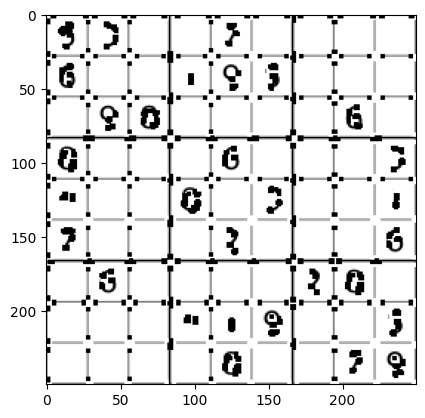

In [33]:
gray = np.float32(img)
dst = cv2.cornerHarris(gray,2,5,0.07)
dst = cv2.dilate(dst,None)
img[dst > 0.01 * dst.max()]=[0]
plt.imshow(img, cmap='gray')
plt.show()

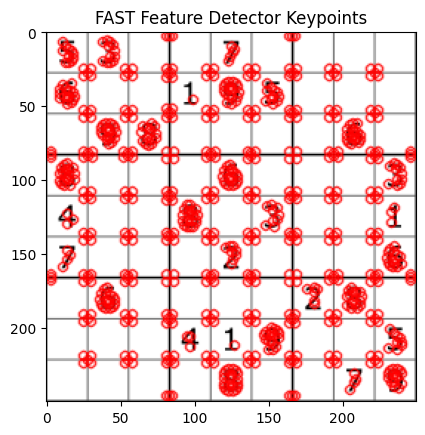

In [36]:
fast = cv2.FastFeatureDetector_create()

kp = fast.detect(img, None)

img2 = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0))

plt.imshow(img2)
plt.title('FAST Feature Detector Keypoints')
plt.show()